In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
df_cifar_1 = pd.read_csv("../exp_results/test_acc_data_cifar_e_1_1000.csv")
df_cifar_5 = pd.read_csv("../exp_results/test_acc_data_cifar_e_5_1000.csv")
df_mnist_1 = pd.read_csv("../exp_results/test_acc_data_mnist_e_1_1000.csv")
df_mnist_5 = pd.read_csv("../exp_results/test_acc_data_mnist_e_5_1000.csv")

df_cifar_1["dataset"], df_cifar_1["local_epochs"] = "CIFAR-10", 1
df_cifar_5["dataset"], df_cifar_5["local_epochs"] = "CIFAR-10", 5
df_mnist_1["dataset"], df_mnist_1["local_epochs"] = "MNIST", 1
df_mnist_5["dataset"], df_mnist_5["local_epochs"] = "MNIST", 5

# df = pd.concat([df_cifar_1, df_cifar_5, df_mnist_1, df_mnist_5], ignore_index=True)

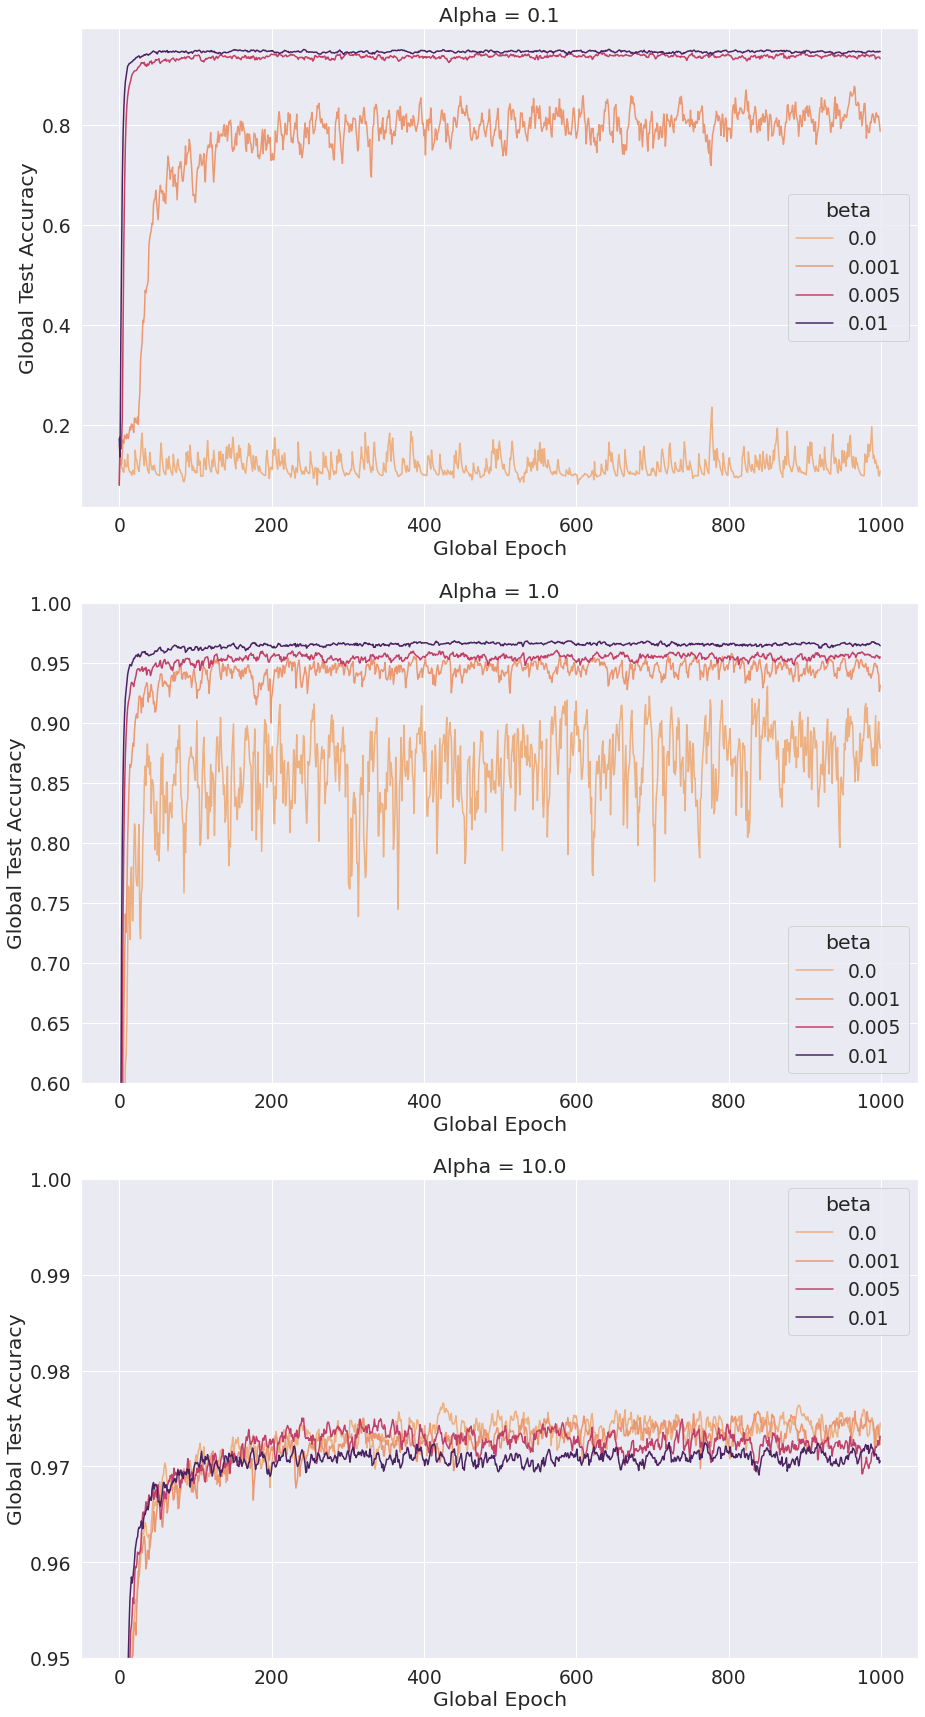

In [11]:
dataset = "mnist"

df = df_cifar_5 if dataset == "cifar" else df_mnist_5

smoothing = 0.6
alphas = [0.1, 1.0, 10.0]
betas = set(df["beta"])

for alpha in alphas:
    for beta in betas:
        y = df[(df["alpha"] == alpha) & (df["beta"] == beta)]["Global Test Accuracy"]
        y_smooth = y.ewm(alpha=(1 - smoothing)).mean()
        df.loc[(df["alpha"] == alpha) & (df["beta"] == beta), "Global Test Accuracy"] = y_smooth

sns.set(rc={"figure.figsize":(15, 10 * len(alphas))})
sns.set(font_scale=1.7)

fig, axs = plt.subplots(len(alphas))

for i, (ax, alpha) in enumerate(zip(axs, alphas)):
    df_alpha = df[df["alpha"] == alpha]
    
    ax.set_title(f"Alpha = {alpha}")

    sns.lineplot(
        data=df_alpha,
        x="Global Epoch",
        y="Global Test Accuracy",
        hue="beta",
        palette="flare",
        # hue_norm=matplotlib.colors.PowerNorm(gamma=0.1),
        ax=ax
    )

    if dataset == "mnist":
        if i == 1:
            ax.set_ylim(0.6, 1)
        if i == 2:
            ax.set_ylim(0.95, 1)

    if dataset == "cifar":
        if i == 1:
            ax.set_ylim(0.35, 0.6)
        if i == 2:
            ax.set_ylim(0.55, 0.7)

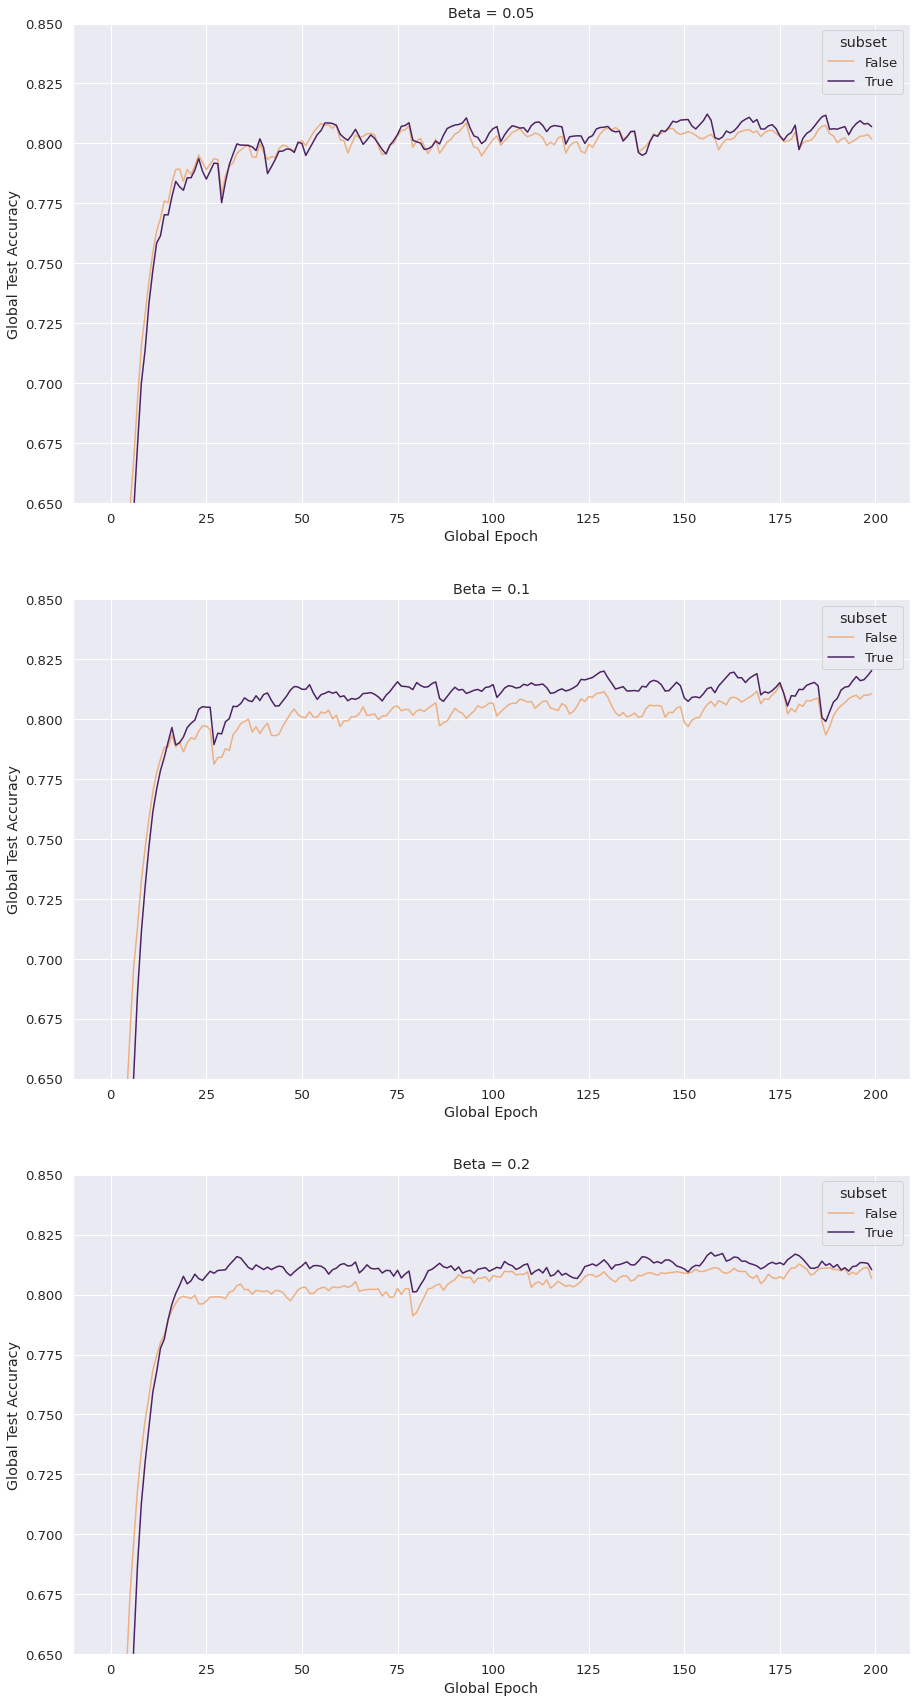

In [17]:
dataset = "cifar"
df = pd.read_csv(f"../exp_results_subset/test_acc_data_{dataset}_e_1.csv")

smoothing = .75
betas = [0.05, 0.1, 0.2]

for beta in betas:
    y = df[(df["beta"] == beta)]["Global Test Accuracy"]
    y_smooth = y.ewm(alpha=(1 - smoothing)).mean()
    df.loc[(df["beta"] == beta), "Global Test Accuracy"] = y_smooth

sns.set(rc={"figure.figsize":(15, 10 * len(betas))})
sns.set(font_scale=1.2)

fig, axs = plt.subplots(len(betas))

for ax, beta in zip(axs, betas):
    df_beta = df[df["beta"] == beta]
    
    ax.set_title(f"Beta = {beta}")

    sns.lineplot(
        data=df_beta,
        x="Global Epoch",
        y="Global Test Accuracy",
        hue="subset",
        palette="flare",
        hue_norm=matplotlib.colors.PowerNorm(gamma=0.1),
        ax=ax
    )

    if dataset == "mnist":
        ax.set_ylim(0.95, 1)
    if dataset == "cifar":
        ax.set_ylim(0.65, 0.85)